<a href="https://colab.research.google.com/github/HongTorxh/Study_Paran/blob/main/tensorflow_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

In [4]:
input_shape = (28,28, 1)
num_classes = 10

In [5]:
inputs = layers.Input(input_shape, dtype=tf.float64)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.shuffle(1000)
train_ds = train_ds.batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(32)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

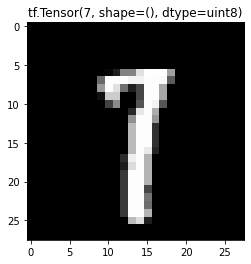

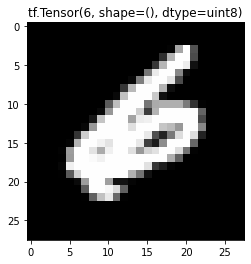

In [13]:
for image, label in train_ds.take(2):
  plt.title(str(label[0]))
  plt.imshow(image[0, :, :, 0], 'gray')
  plt.show()

In [14]:
image, label = next(iter(train_ds))

In [15]:
image.shape, label.shape

(TensorShape([32, 28, 28, 1]), TensorShape([32]))

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(train_ds, epochs = 1)

1875/1875 [==============================] - 306s 163ms/step - loss: 0.1901


In [18]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [19]:
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = 'test_accuracy')

In [24]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_loss(loss)
    train_accuracy(labels, predictions)

In [22]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [25]:
for epoch in range(2):
  print('start Training')
  for images, labels, in train_ds:
    train_step(images, labels)
  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Acccuray{}'
  print(template.format(epoch+1, train_loss.result(), train_accuracy.result() * 100, test_loss.result(), test_accuracy.result() * 100))

start Training
Epoch 1, Loss: 0.04579905420541763, Accuracy: 98.586669921875, Test Loss: 0.03484383970499039, Test Acccuray98.80999755859375
start Training
Epoch 2, Loss: 0.03609592467546463, Accuracy: 98.86833190917969, Test Loss: 0.030612945556640625, Test Acccuray98.94499969482422
